# Chapitre 3

Dans ce TP, nous allons effectuer l'entraînement de modèles RNN sur une tâche de sequence classification en utilisant le framework [Keras](https://keras.io/). Nous nous baserons sur le dataset [Reuters Newswire Topics](https://keras.io/api/datasets/reuters/).

Le dataset Reuters Newswire Topics est une collection de 11 228 fils de presse de l'agence de presse Reuters. Chaque fil de presse est associé à un sujet parmi 46 classes de sujets.

Voici les points abordés dans le TP:
* Exploration du dataset  
* Définition de modèles RNN pour la classification  
* Entraînement de ces modèles pour la tâche de classification  
* Evaluation et benchmark des modèles entraînés


# Chargement du dataset

Chargez le dataset Reuters Newswire Topics, vous pouvez pour cela utiliser la fonction `reuters.load_data()` dans keras. Utilisez un test split de `0.2`

In [12]:
from tensorflow.keras.datasets import reuters
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Charger le dataset Reuters Newswire
(x_train, y_train), (x_test, y_test) = reuters.load_data(test_split=0.2)

# Afficher quelques informations sur le dataset
print(f"Taille des données d'entraînement: {len(x_train)}")
print(f"Taille des données de test: {len(x_test)}")
print(f"Nombre de classes: {len(set(y_train))}")


Taille des données d'entraînement: 8982
Taille des données de test: 2246
Nombre de classes: 46


Affichez la liste des 46 classes du dataset

In [13]:
from tensorflow.keras.datasets import reuters

# Charger le dataset Reuters
(_, y_train), (_, y_test) = reuters.load_data()

# Obtenir les classes uniques
classes = set(y_train)
print("Nombre de classes:", len(classes))
print("Liste des classes:", sorted(classes))


Nombre de classes: 46
Liste des classes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]


Affichez quelques exemples du dataset

In [14]:
from tensorflow.keras.datasets import reuters
from tensorflow.keras.preprocessing.text import tokenizer_from_json
import json

# Charger le dataset Reuters avec un split 80/20
(x_train, y_train), (x_test, y_test) = reuters.load_data()

# Charger le dictionnaire de mots pour transformer les séquences en texte
word_index = reuters.get_word_index()

# Inverser l'index pour avoir un mapping id -> mot
index_word = {index + 3: word for word, index in word_index.items()}  # décaler de +3 pour correspondre aux indices Keras

# Fonction pour convertir une séquence de mots en texte
def sequence_to_text(sequence):
    return ' '.join([index_word.get(i, '?') for i in sequence])

# Afficher quelques exemples
for i in range(5):  # Affiche 5 exemples
    print(f"Texte {i+1} (Classe {y_train[i]}): {sequence_to_text(x_train[i])}")
    print("\n")


Texte 1 (Classe 3): ? mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


Texte 2 (Classe 4): ? generale de banque sa lt genb br and lt heller overseas corp of chicago have each taken 50 pct stakes in factoring company sa belgo factors generale de banque said in a statement it gave no financial details of the transaction sa belgo factors' turnover in 1986 was 17 5 billion belgian francs reuter 3


Texte 3 (Classe 3): ? shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 1

Calculez et affichez la taille de la séquence la plus longue

In [15]:
# Calcul de la longueur de chaque séquence
longueur_sequences = [len(sequence) for sequence in x_train]

# Obtenir la taille de la séquence la plus longue
longueur_max = max(longueur_sequences)
print(f"Taille de la séquence la plus longue : {longueur_max}")


Taille de la séquence la plus longue : 2376


Calculez et affichez la taille du vocabulaire

In [16]:
# Utiliser set pour trouver tous les mots uniques dans le dataset d'entraînement
vocabulaire = set()
for sequence in x_train:
    vocabulaire.update(sequence)

# Calculer la taille du vocabulaire
taille_vocabulaire = len(vocabulaire)
print(f"Taille du vocabulaire : {taille_vocabulaire}")


Taille du vocabulaire : 28138


# Preprocessing du dataset

Eventuellement, effectuez des preprocessings que vous jugez pertinents

In [17]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences


# Ajouter le padding sur les séquences (x_train et x_test sont déjà des indices)
x_train_padded = pad_sequences(x_train, padding='post', maxlen=500)
x_test_padded = pad_sequences(x_test, padding='post', maxlen=500)

# Convertir les labels en one-hot encoding
num_classes = len(set(y_train))
y_train_categorical = to_categorical(y_train, num_classes=num_classes)
y_test_categorical = to_categorical(y_test, num_classes=num_classes)

# Afficher les dimensions après le padding et le one-hot encoding
print(f"Dimensions de x_train après padding: {x_train_padded.shape}")
print(f"Dimensions de x_test après padding: {x_test_padded.shape}")
print(f"Dimensions de y_train après one-hot encoding: {y_train_categorical.shape}")
print(f"Dimensions de y_test après one-hot encoding: {y_test_categorical.shape}")

# Vérifier les indices dans les séquences
max_index = max(max(sequence) for sequence in x_train_padded)
print(f"Index maximum dans les séquences: {max_index}")


Dimensions de x_train après padding: (8982, 500)
Dimensions de x_test après padding: (2246, 500)
Dimensions de y_train après one-hot encoding: (8982, 46)
Dimensions de y_test après one-hot encoding: (2246, 46)
Index maximum dans les séquences: 30981


# Définition des modèles

Nous allons à présent définir quelques modèles qu'on va entraîner puis comparer. Voici quelques configurations qu'on peut tester:  
* Un RNN classique avec une seule couche  
* Un LSTM avec une seule couche  
* Un Stacked LSTM avec deux couches LSTM empilées  
* Un Bidirectional LSTM avec une seule couche  
* Une architecture définie par vous même  

Voici un exemple pour le premier modèle:  

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
# Calculer la taille du vocabulaire en fonction des indices dans les données
max_index_in_data = max(max(sequence) for sequence in x_train)
taille_vocabulaire = max_index_in_data + 1  # Ajouter 1 pour inclure l'indice maximum

# On définit un modèle Sequential qui définit une famille de modèle sous forme de couches qui se suivent
model_rnn = Sequential()
# La layer Embedding sert à créer des word embeddings, chaque mot est représenté par un vecteur de taille fixe (50)
model_rnn.add(Embedding(taille_vocabulaire, 50))
# On ajoute une couche de RNN simple au modèle. Le paramètre 100 indique la taille du hidden state.
model_rnn.add(SimpleRNN(100))
# On ajoute à la fin une couche Dense (Fully connected) qui va utiliser le
# hidden state afin d'effectuer la classification. num_classes est la taille
# de la sortie de cette couche (num_classes = 46), l'activation est un
# softmax indiquant qu'on veut faire une classification multiclasse.
model_rnn.add(Dense(num_classes, activation="softmax"))
model_rnn.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Définissez au moins 2 de ces modèles ainsi qu'une architecture définie par vous même

In [19]:
from tensorflow.keras.layers import LSTM

# Définir le modèle LSTM classique
model_lstm = Sequential()
model_lstm.add(Embedding(taille_vocabulaire, 50))  # Embedding layer avec vecteurs de 50 dimensions
model_lstm.add(LSTM(100))  # Couche LSTM avec 100 unités
model_lstm.add(Dense(num_classes, activation="softmax"))  # Couche Dense pour la classification
model_lstm.summary()


# Définir le modèle Stacked LSTM
model_stacked_lstm = Sequential()
model_stacked_lstm.add(Embedding(taille_vocabulaire, 50))  # Embedding layer avec vecteurs de 50 dimensions
model_stacked_lstm.add(LSTM(100, return_sequences=True))  # 1ère couche LSTM avec 'return_sequences=True' pour la sortie des séquences
model_stacked_lstm.add(LSTM(100))  # 2ème couche LSTM
model_stacked_lstm.add(Dense(num_classes, activation="softmax"))  # Couche Dense pour la classification
model_stacked_lstm.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

# Entraînement des modèles

Configurez les modèles afin qu'ils puissent être entraînés. Pour cela, utiliser la fonction `compile` en spécifiant les paramètres de l'entraînement:  
* **optimizer**: spécifie quel algorithme de descente de gradient utiliser, vous pouvez laisser le paramètre par défaut `"rmsprop"`  
* **loss**: spécifie la fonction de loss à utiliser. Il faut choisir une loss qui correspond à notre tâche de classification multiclasse.  
* **metrics**: c'est la liste des métriques qu'on veut monitorer pendant l'entraînement

In [20]:
model_rnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_stacked_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Lancer l'entraînement des modèles en utilisant la fonction `fit`. Spécifiez un paramètre `validation_split=0.2`, ce qui permettra de surveiller si le modèle overfit sur le dataset de train.  
Si votre modèle overfit, essayez de réduire/supprimer cet overfitting

**Conseil** : Séparez les entraînements sur plusieurs cellules afin de pouvoir debugger plus facilement.

In [21]:
# Entraîner le modèle RNN classique
history_rnn = model_rnn.fit(
    x_train_padded,
    y_train_categorical,
    epochs=15,
    batch_size=32,
    validation_split=0.2,  # Utilisation de 20% des données d'entraînement pour la validation
    verbose=1
)


Epoch 1/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 41s 175ms/step - accuracy: 0.3099 - loss: 2.6879 - val_accuracy: 0.3450 - val_loss: 2.4181
Epoch 2/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 41s 176ms/step - accuracy: 0.3619 - loss: 2.3958 - val_accuracy: 0.3472 - val_loss: 2.4189
Epoch 3/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 41s 175ms/step - accuracy: 0.3525 - loss: 2.4247 - val_accuracy: 0.3478 - val_loss: 2.4194
Epoch 4/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 39s 175ms/step - accuracy: 0.3338 - loss: 2.4257 - val_accuracy: 0.3450 - val_loss: 2.4414
Epoch 5/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 41s 175ms/step - accuracy: 0.3447 - loss: 2.4993 - val_accuracy: 0.3484 - val_loss: 2.4210
Epoch 6/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 41s 175ms/step - accuracy: 0.3572 - loss: 2.4027 - val_accuracy: 0.3489 - val_loss: 2.4061
Epoch 7/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 41s 176ms/step - accuracy: 0.3586 - loss: 2.4020 - val_accuracy: 0.3495 - val_loss: 2.4041
Epoch 8/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 41s 177ms/step - accuracy: 0.3530 - loss: 2

In [22]:
# Entraîner le modèle LSTM classique
history_lstm = model_lstm.fit(
    x_train_padded,
    y_train_categorical,
    epochs=15,
    batch_size=32,
    validation_split=0.2,  # Utilisation de 20% des données d'entraînement pour la validation
    verbose=1
)


Epoch 1/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 88s 380ms/step - accuracy: 0.3442 - loss: 2.6741 - val_accuracy: 0.3450 - val_loss: 2.4135
Epoch 2/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 142s 379ms/step - accuracy: 0.3552 - loss: 2.4116 - val_accuracy: 0.3484 - val_loss: 2.3999
Epoch 3/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 142s 379ms/step - accuracy: 0.3498 - loss: 2.4276 - val_accuracy: 0.3484 - val_loss: 2.4014
Epoch 4/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 141s 378ms/step - accuracy: 0.3613 - loss: 2.3882 - val_accuracy: 0.3478 - val_loss: 2.4038
Epoch 5/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 91s 403ms/step - accuracy: 0.3554 - loss: 2.3717 - val_accuracy: 0.3484 - val_loss: 2.3967
Epoch 6/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 138s 386ms/step - accuracy: 0.3538 - loss: 2.3961 - val_accuracy: 0.3506 - val_loss: 2.3946
Epoch 7/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 142s 385ms/step - accuracy: 0.3586 - loss: 2.3929 - val_accuracy: 0.3489 - val_loss: 2.4009
Epoch 8/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 142s 387ms/step - accuracy: 0.3570 - l

In [23]:
# Entraîner le modèle Stacked LSTM
history_stacked_lstm = model_stacked_lstm.fit(
    x_train_padded,
    y_train_categorical,
    epochs=15,
    batch_size=32,
    validation_split=0.2,  # Utilisation de 20% des données d'entraînement pour la validation
    verbose=1
)


Epoch 1/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 178s 771ms/step - accuracy: 0.3178 - loss: 2.6334 - val_accuracy: 0.3450 - val_loss: 2.4124
Epoch 2/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 174s 773ms/step - accuracy: 0.3534 - loss: 2.4300 - val_accuracy: 0.3450 - val_loss: 2.4102
Epoch 3/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 173s 771ms/step - accuracy: 0.3585 - loss: 2.4020 - val_accuracy: 0.3484 - val_loss: 2.4054
Epoch 4/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 203s 772ms/step - accuracy: 0.3590 - loss: 2.3866 - val_accuracy: 0.3472 - val_loss: 2.3990
Epoch 5/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 202s 773ms/step - accuracy: 0.3670 - loss: 2.3794 - val_accuracy: 0.3450 - val_loss: 2.3965
Epoch 6/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 201s 769ms/step - accuracy: 0.3609 - loss: 2.3929 - val_accuracy: 0.3484 - val_loss: 2.3935
Epoch 7/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 211s 809ms/step - accuracy: 0.3694 - loss: 2.3552 - val_accuracy: 0.3484 - val_loss: 2.4022
Epoch 8/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 194s 773ms/step - accuracy: 0.3627 -

# Comparaison des modèles

Choisissez des métriques pertinentes pour évaluer vos modèles affichez la performance de chaque modèle selon ces métriques sur le dataset de test pour les comparer

In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Évaluation sur le dataset de test
y_pred_rnn = model_rnn.predict(x_test_padded)
y_pred_lstm = model_lstm.predict(x_test_padded)
y_pred_stacked_lstm = model_stacked_lstm.predict(x_test_padded)


# Convertir les prédictions en étiquettes de classes
y_pred_rnn_classes = y_pred_rnn.argmax(axis=1)
y_pred_lstm_classes = y_pred_lstm.argmax(axis=1)
y_pred_stacked_lstm_classes = y_pred_stacked_lstm.argmax(axis=1)

# Convertir les labels de test en format de classes
# Si y_test est en format one-hot, il faudra le convertir en classes
if len(y_test.shape) > 1:
    y_test_classes = y_test.argmax(axis=1)
else:
    y_test_classes = y_test


# Calculer les métriques de performance
metrics = {}

def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    report = classification_report(y_true, y_pred)



    metrics[model_name] = {
        'accuracy': accuracy,
        'f1_score': f1,
        'classification_report': report
    }

    print(f"--- {model_name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1-Score (Weighted): {f1:.4f}")
    print("Classification Report:")
    print(report)


# Évaluation des différents modèles
evaluate_model(y_test_classes, y_pred_rnn_classes, "RNN")
evaluate_model(y_test_classes, y_pred_lstm_classes, "LSTM")
evaluate_model(y_test_classes, y_pred_stacked_lstm_classes, "Stacked LSTM")


71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 8s 111ms/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 15s 205ms/step
--- RNN ---
Accuracy: 0.3673
F1-Score (Weighted): 0.2091
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.00      0.00      0.00       105
           2       0.00      0.00      0.00        20
           3       0.38      1.00      0.55       813
           4       0.21      0.02      0.03       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       0.00      0.00      0.00        25
          10       0.00      0.00      0.00        30
          11       0.00      0.00      0.00        83
          12       0.00      0.00      0.00        13
          13       0.00      0.00      0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

Sélectionnez un des modèles (le meilleur par exemple) et affichez une matrice de confusion du résultat de la classification

--- RNN ---


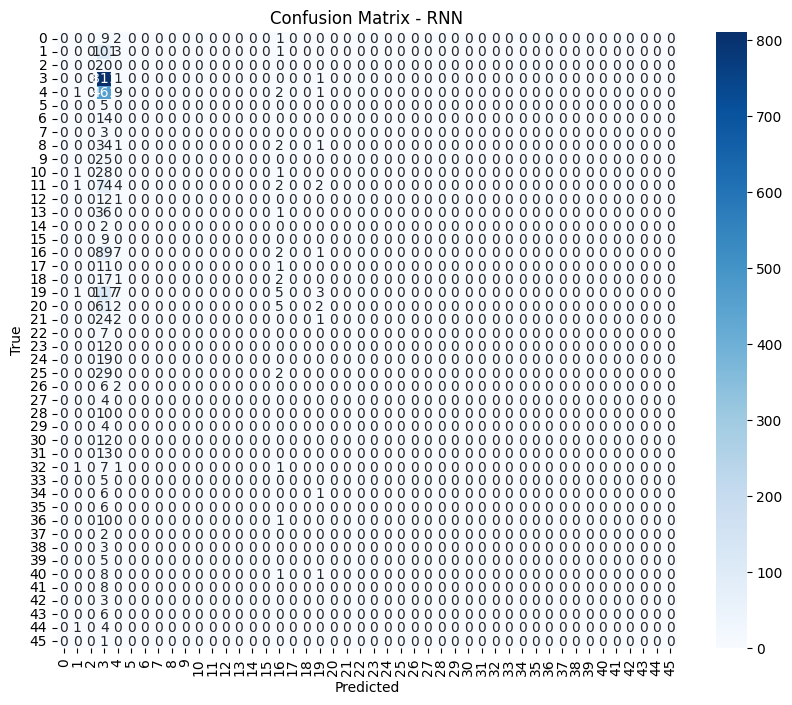

--- LSTM ---


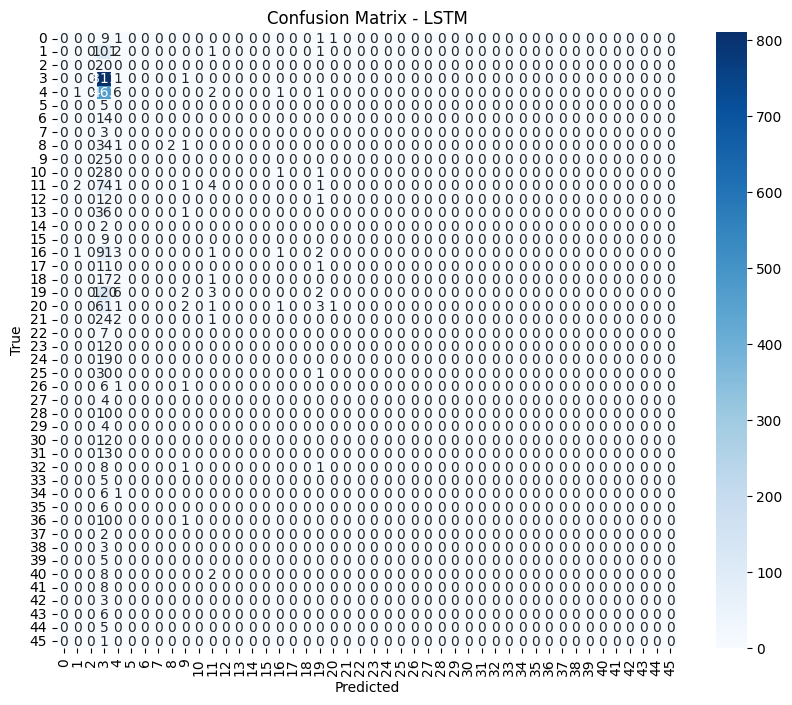

--- Stacked LSTM ---


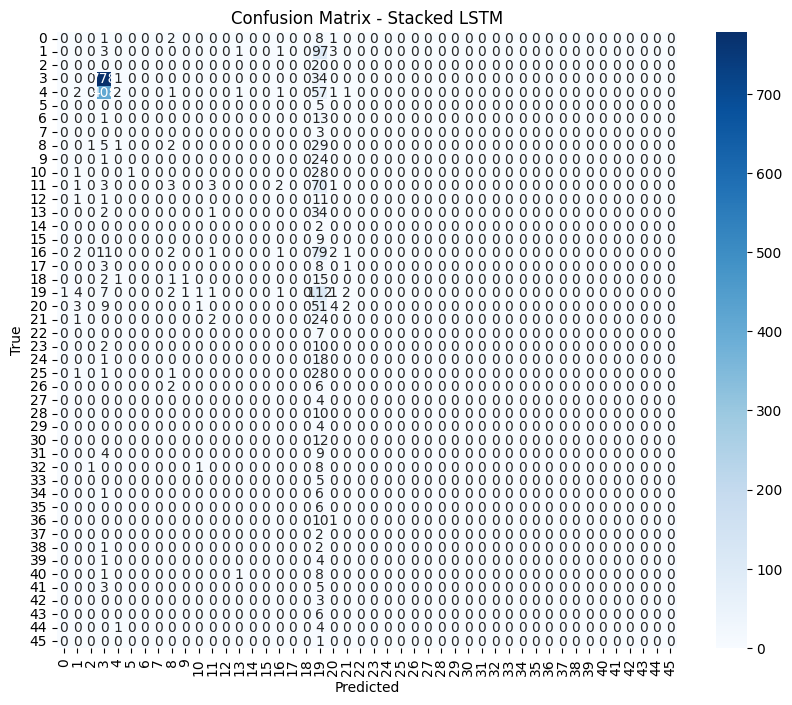

In [31]:
def plot_matrix(y_true, y_pred, model_name):
    print(f"--- {model_name} ---")
    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    # Afficher la confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(46), yticklabels=range(46))
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
plot_matrix(y_test_classes, y_pred_rnn_classes, "RNN")
plot_matrix(y_test_classes, y_pred_lstm_classes, "LSTM")
plot_matrix(y_test_classes, y_pred_stacked_lstm_classes, "Stacked LSTM")

Afin d'analyser les erreurs commises par le modèle, il est important de regarder de vrais exemples de ces erreurs.  

Affichez quelques exemples d'erreurs effectuées par votre modèle. En général, dans une tâche de classification, il est pertinent de commencer par les 2 classes que le modèle confond le plus (d'après la matrice de confusion).  



In [36]:
import numpy as np

def show_confused_examples(y_true, y_pred, class_1, class_2, x_data, num_examples=5):
    # Trouver les indices des erreurs entre les classes confondues
    errors_class_1_as_class_2 = [
        i for i, (true, pred) in enumerate(zip(y_true, y_pred)) if true == class_1 and pred == class_2
    ]
    errors_class_2_as_class_1 = [
        i for i, (true, pred) in enumerate(zip(y_true, y_pred)) if true == class_2 and pred == class_1
    ]

    # Afficher les exemples d'erreur
    print(f"Exemples d'erreurs entre les classes {class_1} et {class_2}:")

    print(f"\nExemples où la classe {class_1} a été prédite comme classe {class_2}:")
    for i in range(min(num_examples, len(errors_class_1_as_class_2))):
        index = errors_class_1_as_class_2[i]
        print(f"Index: {index}, Text: {x_data[index]}")

    print(f"\nExemples où la classe {class_2} a été prédite comme classe {class_1}:")
    for i in range(min(num_examples, len(errors_class_2_as_class_1))):
        index = errors_class_2_as_class_1[i]
        print(f"Index: {index}, Text: {x_data[index]}")

# Exemple d'utilisation avec les données de test
show_confused_examples(y_test, y_pred_rnn_classes, 4, 3, x_test)
show_confused_examples(y_test, y_pred_lstm_classes, 4, 3, x_test)
show_confused_examples(y_test, y_pred_stacked_lstm_classes, 4, 3, x_test)


Exemples d'erreurs entre les classes 4 et 3:

Exemples où la classe 4 a été prédite comme classe 3:
Index: 3, Text: [1, 11786, 13716, 65, 9, 249, 1096, 8, 16, 515, 4, 211, 5, 881, 7, 78, 181, 65, 9, 249, 1441, 6, 56, 387, 280, 141, 81, 13, 360, 11, 15, 4, 49, 8, 16, 385, 69, 68, 327, 5, 25, 132, 20, 128, 7, 4, 6452, 3254, 9, 681, 30587, 1441, 25, 78, 473, 814, 1110, 16, 8, 16, 529, 69, 119, 11, 15, 5, 4, 1154, 6, 16657, 1679, 21, 25, 645, 4005, 975, 2170, 303, 1679, 464, 21, 4, 1004, 279, 11, 15, 5, 975, 57, 85, 2589, 457, 207, 448, 43, 10, 447, 16, 8, 4, 49, 8, 4, 123, 755, 62, 4198, 6, 960, 42, 2559, 5, 126, 231, 8326, 9, 42, 148, 5, 128, 6, 165, 44, 20, 22, 165, 70, 20, 457, 207, 1504, 16, 8, 4, 15576, 2049, 96, 13, 19, 1340, 18, 1379, 34, 75, 717, 6, 132, 26, 22, 19, 132, 15, 4, 49, 8, 387, 280, 200, 6, 67, 4, 404, 5, 879, 122, 28, 4, 6452, 3254, 979, 17, 12]
Index: 4, Text: [1, 470, 354, 18270, 4231, 62, 2373, 509, 1687, 5138, 7, 4, 4893, 410, 4, 8178, 9, 2185, 9371, 7, 68, 5, 4, 

Vous pouvez ainsi réitérer sur votre processus d'entraînement en effectuant des modification selon votre analyse d'erreur. Par exemple:  
* Changement d'hyperparamètre d'entraînement  
* Modification de l'architecture du réseau  
* Changement des preprocessings  
* ...